# Creación del dataset dsualm

Antes de nada necesitamos cargar las librerías pandas, matplotlib,networkx y el paquete nilmtk.

Asimismo realizaremos algunos otros ajustes.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
from nilmtk.utils import print_dict
from nilmtk import DataSet
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

## Creación del fichero en formato  HDFS5 a partir de las medidas y los metadatos 

La primera tarea es la conversion de los diferentes ficheros de medidas en formato csv al formato HDFS5  (o simplificando H5), que almacenaramos en la carpeta `./data`. Además en el archivo h5, que va contener los datos recopilados,  tambien tendremos todos  los metadatos del dataset.

El timestamp arrojado por el oZM esta en  en formato 13 digitos (es decir almacena hasta los milisegundos pasados desde el 1 del 1 de 1970).El Timestamp en "timezone" para Almeria es "Europe/Madrid" https://www.epochconverter.com/

El resto de metadatos tienen que ver con la potencia (real,reactiva y aparente), el voltaje, la intensidad,la frecuencia y el factor de potencia.

Para cada fichero csv, que numeraremos del 1 al 11 corresponditntes a cada medidor (siendo el nº 1 el principal),en la clase convert_ualm,  seguimos los siguintes pasos:

- Lectura del fichero numeado

- Conversión a formato fecha del campo timestamp

- Carga del resto de columnas

- Sort index

- Resample

- Reindexacion del fichero

Obviamente la clase  lanza este proceso para todos los ficheros de datos localizados en la carpeta de entrada \electricity\  usando  el fichero labels.csv

El contenido del fichero labels.csv es el siguinte:

- 1 mains

- 2 electric furnace

- 3 microwave

- 4 television

- 5 kettle

- 6 vacuum_cleaner

- 7 electric space heater

- 8 alectric shower heater

- 9 fan

- 10 fridge

- 11 freezer


Por ultimo, asociamos los metadatos correspondientes ,leyendo los ficheros de la ruta C:\Users\XXXXX\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\dataset_converters\ualm\metadata. 


Los ficheros que usaremos como metadatos para incorporarlos al fichero H5 son los siguintes:

 - builiding1.yaml
 
 - dataset.yaml
 
 - meter_devices.yaml



In [2]:
from nilmtk.dataset_converters import convert_ualm
convert_ualm('./data/ozm1/', 'dsual.h5','2022-11-07', '2022-11-07')


Path ualm: ./data/ozm1/ /electricity

***********************************************************************************************
..Loading file    1 .csv
..Reading file csv
          timestamp          W       VAR           VA        f      VLN  \
0      1.667813e+12    17.6157  -5.72538    18.522721  50.0063  243.036   
1      1.667813e+12    17.0138  -6.33315    18.154254  50.0063  242.976   
2      1.667813e+12    16.5847  -5.67179    17.527691  50.0063  243.006   
3      1.667813e+12    17.0224  -6.68467    18.287857  50.0060  242.986   
4      1.667813e+12    16.7171  -6.39622    17.898931  50.0060  243.022   
...             ...        ...       ...          ...      ...      ...   
29289  1.667819e+12  2656.1100  11.01860  2656.129300  49.9536  237.988   
29290  1.667819e+12  2655.2800   9.59250  2655.297112  49.9540  237.935   
29291  1.667819e+12  2656.2100  11.17100  2656.236625  49.9546  237.923   
29292  1.667819e+12  2654.4400   9.93879  2654.455130  49.9550  237.888 

..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.667813e+12  7.40977 -1.077810  7.487750  50.0423  244.183  0.793571   
1      1.667813e+12  7.16313 -1.105450  7.247932  50.0423  244.119  0.862673   
2      1.667813e+12  7.39859 -0.889593  7.451879  50.0425  244.148  0.833011   
3      1.667813e+12  7.11625 -1.496420  7.271882  50.0427  244.164  0.838800   
4      1.667813e+12  6.83709 -1.115010  6.927414  50.0430  244.140  0.826504   
...             ...      ...       ...       ...      ...      ...       ...   
39424  1.667821e+12  7.01313 -0.941539  7.076048  50.0100  246.284  0.839309   
39425  1.667821e+12  7.43456 -1.056610  7.509269  50.0100  246.358  0.834041   
39426  1.667821e+12  6.61771 -0.616003  6.646318  50.0098  246.337  0.807369   
39427  1.667821e+12  6.66844 -1.028840  6.747343  50.0098  246.307  0.754056   
39428  1.667821e+12  7.30953 -0.672236  7.340372  50.0098  246.307  0.838678   

              A  
0 

Conversion of timestamp
                                        W       VAR        VA        f  \
2022-11-07 10:25:50.605000+01:00  5.19575 -1.327860  5.362746  50.0423   
2022-11-07 10:25:50.804000+01:00  5.18779 -1.771850  5.482026  50.0423   
2022-11-07 10:25:51.004000+01:00  5.14824 -1.363840  5.325831  50.0425   
2022-11-07 10:25:51.205000+01:00  5.68548 -1.584120  5.902048  50.0427   
2022-11-07 10:25:51.404000+01:00  4.87322 -1.241500  5.028879  50.0430   
...                                   ...       ...       ...      ...   
2022-11-07 12:37:14.682000+01:00  4.64529 -0.695379  4.697044  50.0100   
2022-11-07 12:37:14.882000+01:00  5.09310 -1.487630  5.305915  50.0100   
2022-11-07 12:37:15.082000+01:00  5.57499 -0.869512  5.642389  50.0098   
2022-11-07 12:37:15.282000+01:00  4.71535 -1.471700  4.939675  50.0098   
2022-11-07 12:37:15.482000+01:00  4.62631 -0.527483  4.656287  50.0098   

                                      VLN        PF         A  
2022-11-07 10:25:50.605

Conversion of timestamp
                                        W      VAR        VA        f  \
2022-11-07 10:25:50.658000+01:00  2.98132 -2.52366  3.906039  50.0063   
2022-11-07 10:25:50.858000+01:00  2.72179 -2.73688  3.859873  50.0063   
2022-11-07 10:25:51.058000+01:00  2.41594 -2.26600  3.312324  50.0063   
2022-11-07 10:25:51.258000+01:00  3.34068 -2.45637  4.146548  50.0060   
2022-11-07 10:25:51.458000+01:00  2.90621 -2.86870  4.083566  50.0060   
...                                   ...      ...       ...      ...   
2022-11-07 12:02:18.258000+01:00  2.65003 -2.68008  3.769015  49.9590   
2022-11-07 12:02:18.458000+01:00  2.41984 -2.85734  3.744333  49.9588   
2022-11-07 12:02:18.658000+01:00  3.10212 -2.03193  3.708361  49.9588   
2022-11-07 12:02:18.858000+01:00  2.52427 -2.66558  3.671140  49.9588   
2022-11-07 12:02:19.058000+01:00  2.58072 -3.04176  3.989035  49.9588   

                                      VLN        PF         A  
2022-11-07 10:25:50.658000+01:00  2

Conversion of timestamp
                                        W      VAR        VA        f  \
2022-11-07 10:25:50.605000+01:00  6.89174 -1.82640  7.129639  50.0423   
2022-11-07 10:25:50.804000+01:00  7.66633 -1.83649  7.883231  50.0423   
2022-11-07 10:25:51.004000+01:00  7.22171 -2.35101  7.594757  50.0425   
2022-11-07 10:25:51.205000+01:00  7.15238 -1.49984  7.307940  50.0427   
2022-11-07 10:25:51.404000+01:00  7.20300 -2.01206  7.478738  50.0430   
...                                   ...      ...       ...      ...   
2022-11-07 12:37:14.682000+01:00  7.27426 -1.06880  7.352360  50.0100   
2022-11-07 12:37:14.882000+01:00  7.09840 -1.89894  7.348011  50.0100   
2022-11-07 12:37:15.082000+01:00  7.55217 -1.50120  7.699923  50.0098   
2022-11-07 12:37:15.282000+01:00  6.43803 -1.60595  6.635310  50.0098   
2022-11-07 12:37:15.482000+01:00  7.35896 -1.74048  7.561984  50.0098   

                                      VLN        PF         A  
2022-11-07 10:25:50.605000+01:00  2

Conversion of timestamp
                                        W       VAR        VA        f  \
2022-11-07 10:25:50.605000+01:00  5.11365 -1.838920  5.434249  50.0423   
2022-11-07 10:25:50.804000+01:00  4.35526 -0.630443  4.400655  50.0423   
2022-11-07 10:25:51.004000+01:00  4.42196 -0.789712  4.491923  50.0425   
2022-11-07 10:25:51.205000+01:00  4.61164 -1.248350  4.777615  50.0427   
2022-11-07 10:25:51.404000+01:00  4.46847 -1.074550  4.595855  50.0430   
...                                   ...       ...       ...      ...   
2022-11-07 12:37:14.682000+01:00  4.60709 -1.073860  4.730588  50.0100   
2022-11-07 12:37:14.882000+01:00  4.56791 -0.926672  4.660959  50.0100   
2022-11-07 12:37:15.082000+01:00  4.61689 -1.388420  4.821140  50.0098   
2022-11-07 12:37:15.282000+01:00  4.28312 -0.520104  4.314585  50.0098   
2022-11-07 12:37:15.482000+01:00  3.97430 -1.246990  4.165340  50.0098   

                                      VLN        PF         A  
2022-11-07 10:25:50.605

Conversion of timestamp
                                        W      VAR        VA        f  \
2022-11-07 10:25:50.658000+01:00  7.46735 -4.59234  8.766469  50.0063   
2022-11-07 10:25:50.858000+01:00  7.10059 -4.79041  8.565416  50.0063   
2022-11-07 10:25:51.058000+01:00  6.89600 -4.03357  7.989022  50.0063   
2022-11-07 10:25:51.258000+01:00  7.47236 -4.56857  8.758312  50.0060   
2022-11-07 10:25:51.458000+01:00  6.66467 -4.19305  7.873977  50.0060   
...                                   ...      ...       ...      ...   
2022-11-07 12:14:06.427000+01:00  6.48141 -4.11490  7.677310  49.9983   
2022-11-07 12:14:06.627000+01:00  6.89190 -3.82017  7.879847  49.9983   
2022-11-07 12:14:06.827000+01:00  6.58665 -4.42117  7.932886  49.9983   
2022-11-07 12:14:07.027000+01:00  6.56359 -5.05716  8.285871  49.9983   
2022-11-07 12:14:07.227000+01:00  7.37123 -4.30389  8.535716  49.9985   

                                      VLN        PF         A  
2022-11-07 10:25:50.658000+01:00  2

Conversion of timestamp
                                        W      VAR        VA        f  \
2022-11-07 10:25:50.475000+01:00  7.90479 -2.80851  8.388886  50.0503   
2022-11-07 10:25:50.676000+01:00  7.38013 -2.58180  7.818693  50.0513   
2022-11-07 10:25:50.875000+01:00  7.72246 -2.91620  8.254728  50.0517   
2022-11-07 10:25:51.075000+01:00  7.95160 -2.89903  8.463588  50.0513   
2022-11-07 10:25:51.275000+01:00  7.21283 -2.75389  7.720680  50.0513   
...                                   ...      ...       ...      ...   
2022-11-07 12:37:14.773000+01:00  7.22229 -2.43490  7.621695  50.0096   
2022-11-07 12:37:14.973000+01:00  7.93657 -2.00262  8.185331  50.0098   
2022-11-07 12:37:15.173000+01:00  6.89459 -2.37387  7.291819  50.0096   
2022-11-07 12:37:15.373000+01:00  6.97790 -2.34751  7.362193  50.0096   
2022-11-07 12:37:15.573000+01:00  6.76428 -1.96971  7.045225  50.0081   

                                      VLN        PF         A  
2022-11-07 10:25:50.475000+01:00  2

Conversion of timestamp
                                        W      VAR        VA        f  \
2022-11-07 10:25:50.475000+01:00  7.08851 -2.57775  7.542667  50.0503   
2022-11-07 10:25:50.676000+01:00  6.50020 -2.65008  7.019652  50.0513   
2022-11-07 10:25:50.875000+01:00  6.37835 -2.98486  7.042208  50.0517   
2022-11-07 10:25:51.075000+01:00  6.87205 -2.83714  7.434680  50.0513   
2022-11-07 10:25:51.275000+01:00  6.68970 -2.63829  7.191151  50.0513   
...                                   ...      ...       ...      ...   
2022-11-07 12:37:14.773000+01:00  5.94075 -2.68085  6.517631  50.0096   
2022-11-07 12:37:14.973000+01:00  5.68995 -3.07019  6.465415  50.0098   
2022-11-07 12:37:15.173000+01:00  6.25940 -1.78218  6.508170  50.0096   
2022-11-07 12:37:15.373000+01:00  5.77918 -2.86232  6.449167  50.0096   
2022-11-07 12:37:15.573000+01:00  6.49545 -2.59455  6.994464  50.0081   

                                      VLN        PF         A  
2022-11-07 10:25:50.475000+01:00  2

Conversion of timestamp
                                        W      VAR        VA        f  \
2022-11-07 10:25:50.475000+01:00  8.25167 -1.46849  8.381321  50.0503   
2022-11-07 10:25:50.676000+01:00  7.39593 -1.67614  7.583481  50.0513   
2022-11-07 10:25:50.875000+01:00  7.37613 -1.73864  7.578274  50.0517   
2022-11-07 10:25:51.075000+01:00  8.17194 -1.54705  8.317085  50.0513   
2022-11-07 10:25:51.275000+01:00  7.73284 -2.33926  8.078924  50.0513   
...                                   ...      ...       ...      ...   
2022-11-07 12:37:14.773000+01:00  8.17646 -1.93342  8.401944  50.0096   
2022-11-07 12:37:14.973000+01:00  7.61338 -2.19234  7.922751  50.0098   
2022-11-07 12:37:15.173000+01:00  7.52334 -2.04063  7.795177  50.0096   
2022-11-07 12:37:15.373000+01:00  6.98111 -1.61914  7.166417  50.0096   
2022-11-07 12:37:15.573000+01:00  7.49305 -2.24103  7.821003  50.0081   

                                      VLN        PF         A  
2022-11-07 10:25:50.475000+01:00  2

Conversion of timestamp
                                        W      VAR         VA        f  \
2022-11-07 10:25:50.475000+01:00  11.7284 -3.46167  12.228640  50.0503   
2022-11-07 10:25:50.676000+01:00  11.1783 -3.49107  11.710775  50.0513   
2022-11-07 10:25:50.875000+01:00  11.3138 -3.94759  11.982732  50.0517   
2022-11-07 10:25:51.075000+01:00  10.9043 -3.59813  11.482577  50.0513   
2022-11-07 10:25:51.275000+01:00  11.5686 -3.63941  12.127555  50.0513   
...                                   ...      ...        ...      ...   
2022-11-07 12:37:14.773000+01:00  10.3581 -4.40431  11.255628  50.0096   
2022-11-07 12:37:14.973000+01:00  10.7128 -3.67823  11.326677  50.0098   
2022-11-07 12:37:15.173000+01:00  10.4866 -3.74371  11.134835  50.0096   
2022-11-07 12:37:15.373000+01:00  10.6000 -3.58192  11.188845  50.0096   
2022-11-07 12:37:15.573000+01:00  10.0361 -3.40846  10.599069  50.0081   

                                      VLN        PF         A  
2022-11-07 10:25:50.475

Done converting YAML metadata to HDF5!
Successfully performed the conversion of ualM to HDF5 format! 


Convertidos los metadatos y los datos a HDFS5, la primera tarea es la importación del dataset que se encuentra en formato HDF5 en la carpeta `./data`. Para ello, se carga el archivo dsual.h5 que contiene los datos recopilados y metadatos del dataset.

In [4]:
#dataset de referencia 
dsualm = DataSet('dsual.h5')


## MeterGroup y ElecMeter

Todos los conjuntos de datos de NILM constan de varios grupos de medidores de electricidad. 

Podemos agrupar los contadores por los siguintes criterios:
- Por viviendas en caso de haber mas viviendas por contador principal
- Por el tipo de aparato al que están conectados directamente
- Por frecuencia de muestreo
- O si el medidor es un "medidor de sitio" para toda la casa
- Si es un submedidor, a nivel de electrodomésticos, o incluso a nivel de circuito.

En NILMTK, una de las clases clave es MeterGroup, que almacena una lista de medidores y nos permite seleccionar un subconjunto de medidores, agregar energía de todos los medidores y muchas otras funciones.

Cuando abrimos por primera vez un DataSet, NILMTK crea varios objetosMeterGroup. Hay una clase llamada nilmtk.global_meter_group, la cual contiene todos los medidores cargados actualmente (incluso de varios conjuntos de datos si ha abierto más de un conjunto de datos). 

También hay un MeterGroup por edificio (que vive en el atributoBuilding.elec). También podemos anidar "MeterGroups" para agregar redes de fase dividida, red trifásica y aparatos de suministro dual (240 voltios) en conjuntos de datos de América del Norte y Canadá. 

En este punto, todos los metadatos se han cargado en la memoria pero ninguno de los datos de energía se ha cargado.
Cada edificio tiene un atributo "elec" que es un objeto "MeterGroup"y  que contiene los medidores "ElecMeter".

In [5]:
elec = dsualm.buildings[1].elec #todos los medidores del dataset
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='DSUAL', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(inst

Tenga en cuenta que podria haber grupos de medidores anidados: por ejemplo para un horno électrico y otro para la lavadora secadora (ambos son electrodomésticos de 240 voltios podrian tener dos medidores por electrodoméstico):

In [6]:
elec.nested_metergroups()

[]

Poner estos medidores en un grupo de medidores nos permite sumar fácilmente la demanda de energía registrada por ambos medidores para obtener la demanda de energía total para todo el aparato (pero también es muy fácil ver la demanda de energía del medidor individual).

Podemos obtener fácilmente un grupo de medidores(MeterGroup) de los submedidores o de la red.

In [7]:
elec.mains()

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Podemos obtener fácilmente la suma de los datos de potencia de ambos medidores de red:

In [8]:
elec.mains().power_series_all_data().head()

2022-11-07 10:25:50+01:00    17.314751
2022-11-07 10:25:51+01:00    16.949100
2022-11-07 10:25:52+01:00    16.924601
2022-11-07 10:25:53+01:00    16.295361
2022-11-07 10:25:54+01:00    16.556499
Name: (power, active), dtype: float32

Obtenemos los submedidores asociados al medidor principal

In [9]:
elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='DSUAL', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='DSUAL', appliances=[Appliance(type='fridge', insta

### Etiquetas de dispositivos

In [10]:
labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]
    

    

##  Metadatos

Mediante el metodo print_dict podemos explorar los metadatos asociados al Dataset

In [11]:
print_dict(dsualm.metadata)  #metadatos del dataset

Asimismo podemos explorando los metadatos asociados al edificio

In [12]:
print_dict(dsualm.buildings[1].metadata) #Información del edificio 1 (instancia 1)

Veamos los metadados asociados a los sinte  aparatos de medida

In [13]:
print_dict(elec[1].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[2].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[3].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[4].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[5].get_metadata()) #metadatos de ElecMeter 5 o elec[5]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]

print_dict(elec[7].get_metadata()) #metadatos de ElecMeter 7 o elec[7]

print_dict(elec[8].get_metadata()) #metadatos de ElecMeter 8 o elec[8]

print_dict(elec[9].get_metadata()) #metadatos de ElecMeter 9 o elec[9]


print_dict(elec[10].get_metadata()) #metadatos de ElecMeter 10 o elec[10]

print_dict(elec[11].get_metadata()) #metadatos de ElecMeter 11 o elec[11]




# Estadísticas e información para medidores individuales

La clase 'ElecMeter' representa un solo medidor de electricidad. Cada ElecMeter tiene una lista de objetos de dispositivo asociados. Cada medidor puede estar asociado a uno o más electrodomésticos.ElecMeter tiene muchos de los mismos métodos de estadísticas que MeterGroup, como 'total_energy' , 'available_power_ac_types' , 'power_series', 'power_series_all_data'. 

Ahora exploraremos algunas funciones de estadísticas más (muchas de las cuales también están disponibles en MeterGroup) .

Vamos a  estudiar el medidor asociado al hervidor de agua:

In [14]:
boiler_meter = elec['kettle']

Obtener el  medidor principal  superior o "de aguas arriba" (upstream meter)

In [15]:
boiler_meter.upstream_meter() # happens to be the mains meter group!

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Metadatos sobre la clase de medidor

In [16]:
boiler_meter.device

{'model': 'OZM',
 'manufacturer': 'ual',
 'manufacturer_url': 'https://openzmeter.com/',
 'description': 'Multifunction meter for feeders',
 'sample_period': 60,
 'max_sample_period': 300,
 'measurements': [{'physical_quantity': 'power',
   'type': 'active',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'apparent',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'reactive',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'frequency',
   'type': None,
   'upper_limit': 70,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': None,
   'upper_limit': 270,
   'lower_limit': 0},
  {'physical_quantity': 'pf',
   'type': None,
   'upper_limit': 1,
   'lower_limit': 0},
  {'physical_quantity': 'current',
   'type': None,
   'upper_limit': 100,
   'lower_limit': 0}]}

Aparato dominante:Si los metadatos especifican que un medidor tiene varios medidores conectados, entonces uno de ellos se puede especificar como el dispositivo 'dominante', y este dispositivo se puede recuperar con este método

In [17]:
boiler_meter.dominant_appliance()

Appliance(type='kettle', instance=1)

### Energia total

Algunos métodos estadísticos de MeterGroup permanecen en ElecMeter:

In [18]:
boiler_meter.total_energy() # kWh

apparent    0.635791
reactive    0.002949
active      0.634189
dtype: float64

Podemos optar por volcar todos los datos sobre el medidor de luminarias:

In [19]:
next(boiler_meter.load())

physical_quantity             voltage   current     power                      \
type                                             apparent    active  reactive   
2022-11-07 10:25:50+01:00  244.151001  0.039312  7.506434  7.279035 -1.831445   
2022-11-07 10:25:51+01:00  244.134003  0.035958  7.492664  7.258340 -1.830168   
2022-11-07 10:25:52+01:00  244.102997  0.037174  7.684723  7.442066 -1.891464   
2022-11-07 10:25:53+01:00  244.044998  0.035769  7.517369  7.306136 -1.760202   
2022-11-07 10:25:54+01:00  244.003006  0.038006  7.753886  7.546744 -1.771844   
...                               ...       ...       ...       ...       ...   
2022-11-07 12:37:11+01:00  246.337402  0.118301  7.590178  7.089506 -1.924437   
2022-11-07 12:37:12+01:00  246.260193  0.090345  8.590604  8.080216 -2.378801   
2022-11-07 12:37:13+01:00  246.205795  0.081578  7.483288  7.301056 -1.628524   
2022-11-07 12:37:14+01:00  246.287598  0.037297  7.164178  6.959200 -1.662612   
2022-11-07 12:37:15+01:00  246.317001  0.036609  7.299072  7.116386 -1.615877   

physical_quantity          frequency        pf  
type                                            
2022-11-07 10:25:50+01:00  50.042301  0.762694  
2022-11-07 10:25:51+01:00  50.042919  0.827272  
2022-11-07 10:25:52+01:00  50.043678  0.820641  
2022-11-07 10:25:53+01:00  50.044479  0.837154  
2022-11-07 10:25:54+01:00  50.045483  0.817511  
...                              ...       ...  
2022-11-07 12:37:11+01:00  50.009800  0.306492  
2022-11-07 12:37:12+01:00  50.010201  0.433685  
2022-11-07 12:37:13+01:00  50.010361  0.451383  
2022-11-07 12:37:14+01:00  50.010159  0.758374  
2022-11-07 12:37:15+01:00  50.009800  0.790607  

[7886 rows x 7 columns]

O cargar un generador que nos dará los valores en chunks. Más eficiente.

In [20]:
next (boiler_meter.power_series())

2022-11-07 10:25:50+01:00    7.279035
2022-11-07 10:25:51+01:00    7.258340
2022-11-07 10:25:52+01:00    7.442066
2022-11-07 10:25:53+01:00    7.306136
2022-11-07 10:25:54+01:00    7.546744
                               ...   
2022-11-07 12:37:11+01:00    7.089506
2022-11-07 12:37:12+01:00    8.080216
2022-11-07 12:37:13+01:00    7.301056
2022-11-07 12:37:14+01:00    6.959200
2022-11-07 12:37:15+01:00    7.116386
Name: (power, active), Length: 7886, dtype: float32

### Obtener buenas secciones

Si graficamos los datos de potencia sin procesar, vemos que hay una gran brecha donde, supuestamente, el sistema de medición no estaba funcionando. (si tuviéramos que acercarnos, también veríamos muchos espacios más pequeños) con light_meter.plot.Podemos identificar automáticamente las 'secciones buenas' (es decir, las secciones donde cada par de muestras consecutivas es menor que 'max_sample_period` especificado en los metadatos del conjunto de datos):

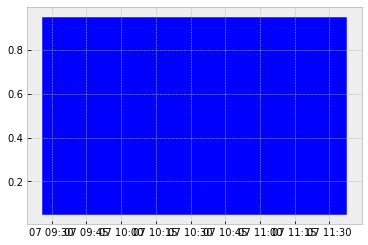

In [21]:
good_sections = boiler_meter.good_sections(full_results=True)
good_sections.plot()

Los fragmentos azules muestran dónde son buenos los datos. Una brecha blanca seria en datos incompletos en los datos de potencia bruta. Teoriacamente podria habermuchos huecos más pequeños que no podemos ver en este nivel de zoom.

También podemos ver las secciones exactas identificadas:

In [22]:
good_sections.combined()

[TimeFrame(start='2022-11-07 10:25:50+01:00', end='2022-11-07 12:37:15+01:00', empty=False)]

## Dropout rate (tasa de deserción )

Además de que puede aparecer grandes lagunas debido a que todo el sistema está inactivo, también podemo teners pequeñas lagunas frecuentes debido a que algunos sensores  arrojan datos. A esto a veces se le llama "abandono". La tasa de abandono es un número entre 0 y 1 que especifica la proporción de muestras que faltan. Una tasa de abandono de 0 significa que no faltan muestras. Un valor de 1 significaría que faltan todas las muestras:

In [23]:
boiler_meter.dropout_rate()

0.0

## Seleccion de subgrupos de medidores

Usamos ElecMeter.select_using_appliances () para seleccionar un nuevo MeterGroup usando un campo de metadatos. Por ejemplo, para obtener todas los ventiladore del conjunto de datos DSUALM::

In [24]:
import nilmtk
nilmtk.global_meter_group.select_using_appliances(type='fan')

MeterGroup(meters=
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

O seleccione varios tipos de aparatos:

In [25]:
elec.select_using_appliances(type=['television', 'fan'])

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

O todos los electrodomésticos del edificio 1 con motor de inducción monofásico (!):

In [26]:
nilmtk.global_meter_group.select_using_appliances(building=1, category='single-phase induction motor')

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='DSUAL', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
)

(NILMTK importa los 'metadatos comunes' del proyecto de metadatos NILM, que incluye una amplia gama de taxonomías de diferentes categorías)(http://nilm-metadata.readthedocs.org/en/latest/central_metadata.html#appliancetype))

## Medidas disponibles para cada medidor exceptuando la potencia

In [27]:
elec.available_physical_quantities() #todas las medidas del MeterGroup

['power', 'voltage', 'pf', 'frequency', 'current']

In [28]:
elec[1].available_physical_quantities() #medidas de ElecMeter 1 (mains)



['power', 'voltage', 'pf', 'frequency', 'current']

In [29]:
elec[2].available_physical_quantities() #medidas de ElecMeter 2 (horno)


['power', 'voltage', 'pf', 'frequency', 'current']

In [30]:
elec[3].available_physical_quantities() #medidas de ElecMeter 3 (microondas)


['power', 'voltage', 'pf', 'frequency', 'current']

In [31]:
elec[4].available_physical_quantities() #medidas de ElecMeter 4 (tv)


['power', 'voltage', 'pf', 'frequency', 'current']

In [32]:
elec[5].available_physical_quantities() #medidas de ElecMeter 5 (hervidor)


['power', 'voltage', 'pf', 'frequency', 'current']

In [33]:
elec[6].available_physical_quantities() #medidas de ElecMeter 6 (aspiradora)


['power', 'voltage', 'pf', 'frequency', 'current']

In [34]:
elec[7].available_physical_quantities() #medidas de ElecMeter 7 (estufa aceite)

['power', 'voltage', 'pf', 'frequency', 'current']

In [35]:
elec[8].available_physical_quantities() #medidas de ElecMeter 8 (calentador)

['power', 'voltage', 'pf', 'frequency', 'current']

In [36]:
elec[9].available_physical_quantities() #medidas de ElecMeter 9 (ventilador)

['power', 'voltage', 'pf', 'frequency', 'current']

In [37]:
elec[10].available_physical_quantities() #medidas de ElecMeter 10 (nevera)

['power', 'voltage', 'pf', 'frequency', 'current']

In [38]:
elec[11].available_physical_quantities() #medidas de ElecMeter 11 (congelador)

['power', 'voltage', 'pf', 'frequency', 'current']

## Medidas disponibles relativas a la potencia


In [39]:
elec[1].available_ac_types('power') #medidas de potencia de ElecMeter 1 

['active', 'apparent', 'reactive']

In [40]:
elec[2].available_ac_types('power') #medidas de potencia de ElecMeter 2

['active', 'apparent', 'reactive']

In [41]:
elec[3].available_ac_types('power') #medidas de potencia de ElecMeter 3

['active', 'apparent', 'reactive']

In [42]:
elec[4].available_ac_types('power') #medidas de potencia de ElecMeter 4

['active', 'apparent', 'reactive']

In [43]:
elec[5].available_ac_types('power') #medidas de potencia de ElecMeter 5

['active', 'apparent', 'reactive']

In [44]:
elec[6].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [45]:
elec[7].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [46]:
elec[8].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [47]:
elec[9].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [48]:
elec[10].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [49]:
elec[11].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

Del atributo 'elec' se puede obtener información de los medidores

En caso de consultar por una medición en específico, se pueden usar los siguientes tipos de mediciones tanto en ‘available_physical_quantities’ como en ‘available_ac_types’: 'power', 'energy', 'cumulative energy', 'voltage', 'current', 'pf', 'frequency', 'power factor', 'state', 'phase angle'.

### Medidas disponibles por electrodomestico o aparato

Podemos  ver las medidas desde otro punto de vista

Veamos qué medidas tenemos para el frigorífico,hervidor,luz,tv,etc:

In [50]:
freezer = elec['fan']
freezer.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('power', 'active'),
 ('power', 'reactive'),
 ('frequency', None),
 ('pf', None)]

In [51]:
boiler = elec['kettle']
boiler.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('power', 'active'),
 ('power', 'reactive'),
 ('frequency', None),
 ('pf', None)]

In [52]:
fan = elec['vacuum cleaner']
fan.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('power', 'active'),
 ('power', 'reactive'),
 ('frequency', None),
 ('pf', None)]

In [53]:
television = elec['television']
television.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('power', 'active'),
 ('power', 'reactive'),
 ('frequency', None),
 ('pf', None)]

In [54]:
microwave = elec['microwave']
microwave.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('power', 'active'),
 ('power', 'reactive'),
 ('frequency', None),
 ('pf', None)]

In [55]:
electric_furnace = elec['electric furnace']
electric_furnace.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('power', 'active'),
 ('power', 'reactive'),
 ('frequency', None),
 ('pf', None)]

In [56]:
electric_space_heater = elec['electric space heater']
electric_space_heater.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('power', 'active'),
 ('power', 'reactive'),
 ('frequency', None),
 ('pf', None)]

In [57]:
electric_shower_heater = elec['electric shower heater']
electric_shower_heater.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('power', 'active'),
 ('power', 'reactive'),
 ('frequency', None),
 ('pf', None)]

In [58]:
fridge = elec[10]
fridge.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('power', 'active'),
 ('power', 'reactive'),
 ('frequency', None),
 ('pf', None)]

In [59]:
freezer = elec[11]
freezer.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('power', 'active'),
 ('power', 'reactive'),
 ('frequency', None),
 ('pf', None)]

## Resumen de mediciones

Ahora veamos un resumen de las medidas disponibles por cada medidor

In [60]:
print('Mediciones disponibles - Dataset: '+str(elec.available_physical_quantities()))
print('Mediciones de Potencia disponibles - Dataset: '+str(elec.available_ac_types('power')))

print('\nMedidas disponibles por cada medidor:')
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_physical_quantities()))

print('\nMedidas de potencia por cada medidor:')  
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_ac_types('power')))

Mediciones disponibles - Dataset: ['power', 'voltage', 'pf', 'frequency', 'current']
Mediciones de Potencia disponibles - Dataset: ['apparent', 'reactive', 'active']

Medidas disponibles por cada medidor:
Main: ['power', 'voltage', 'pf', 'frequency', 'current']
Electric furnace: ['power', 'voltage', 'pf', 'frequency', 'current']
Microwave: ['power', 'voltage', 'pf', 'frequency', 'current']
Television: ['power', 'voltage', 'pf', 'frequency', 'current']
Kettle: ['power', 'voltage', 'pf', 'frequency', 'current']
Vacuum cleaner: ['power', 'voltage', 'pf', 'frequency', 'current']
Electric space heater: ['power', 'voltage', 'pf', 'frequency', 'current']
Electric shower heater: ['power', 'voltage', 'pf', 'frequency', 'current']
Fan: ['power', 'voltage', 'pf', 'frequency', 'current']
Fridge: ['power', 'voltage', 'pf', 'frequency', 'current']
Freezer: ['power', 'voltage', 'pf', 'frequency', 'current']

Medidas de potencia por cada medidor:
Main: ['active', 'apparent', 'reactive']
Electric furna

Los dispositivos se identifican de forma única dentro de un edificio por un tipo (luces, televisión, etc.) y un número de instancia. Si no se especifica un número de instancia, ElecMeter recupera la instancia 1.

### Esquema de red

In [61]:
 def draw_wiring_graph_2(self, show_meter_labels=True):
        graph = self.wiring_graph()
        
        try:
            # Try using graphviz layout...
            pos = nx.drawing.nx_agraph.graphviz_layout(graph, prog='dot')
            used_graphviz = True
        except:
            # ...and fallback to shell layout if graphviz is not installed or
            # doesn't work
            pos = nx.shell_layout(graph)
            used_graphviz = False
            
        meter_labels = {}
        if show_meter_labels:
            meter_labels = {meter: meter.label() for meter in graph.nodes()}
            for meter, name in meter_labels.items():
                x, y = pos[meter]

                if used_graphviz:
                    if meter.is_site_meter():
                        delta_y = 5
                    else:
                        delta_y = -5
                    
                    plt.text(x, y + delta_y, s=name, bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
       

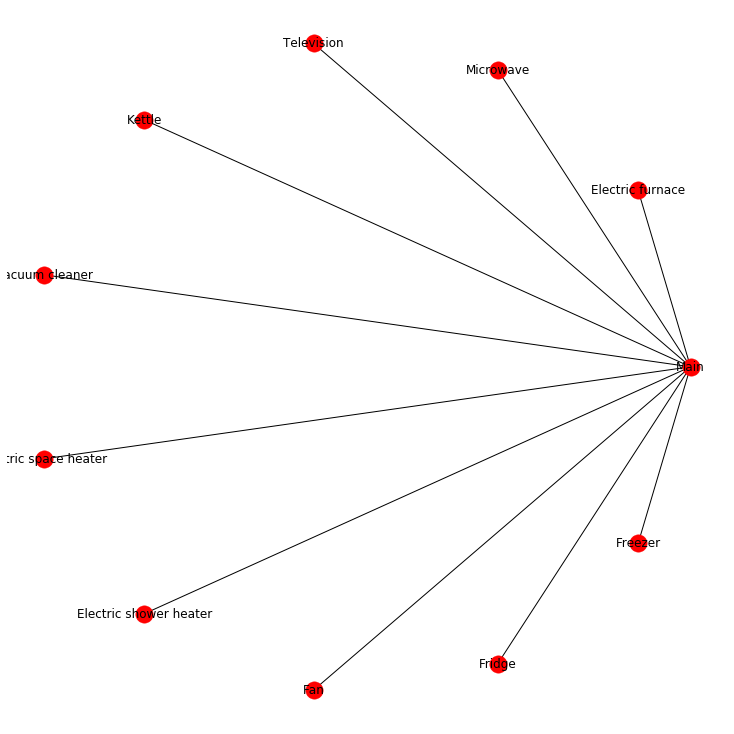

In [62]:
rcParams['figure.figsize'] = (10, 10)
fig = elec.draw_wiring_graph_2(show_meter_labels=False)
#fig = elec.draw_wiring_graph(show_meter_labels=False)

#etiquetas, opcional
pos = nx.shell_layout(fig[0])
nx.draw_networkx_labels(fig[0], pos, labels=Meters)

#guarda gráfico
plt.savefig('./data/images/2.1_Network.svg', bbox_inches='tight', transparent=True)
pass

NOTA: La funcion draw_wiring_graph  presenta problemas con Matplotlib 3.3.0 (y por tanto con NILMTK) segun issue 868 ( https://github.com/nilmtk/nilmtk/issues/868)), por lo que necesitamos reemplazar la función original para poder representar graficamente correctamente las etiquetas, por lo que vamos a crear la nueva funcion elec.draw_wiring_graph_2 que guardaremos en la ruta \user\USUARIO\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\metergroup.py

## Carga de datos en memoria

Intervalos de tiempo en que se registran datos: `elec[1]`

Timestamp en "timezone" es  "Europe/Madrid" https://www.epochconverter.com/

In [63]:
elec.get_timeframe()

TimeFrame(start='2022-11-07 10:25:50+01:00', end='2022-11-07 12:37:15+01:00', empty=False)

Una manera rápida de cargar varios datos de medidores en un DataFrame es utilizar la función `dataframe_of_meters` e indicar cual medida se desea importar desde el MeterGroup.

Observese que solo podemos tomar datos de potencia :active', 'apparent', 'reactive'.




Vamos a mostrar la potencia activa de los medidores del 2 al 11 (es decir todos menos el principal). 

In [64]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='active') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2022-11-07 10:25:00+01:00,7.184515,5.171018,2.825576,7.395792,4.563028,7.188543,7.590068,6.575097,7.729356,11.271597
2022-11-07 10:26:00+01:00,1355.974976,792.033569,2.597803,5.745048,503.989532,7.281439,7.400056,6.392639,75.555763,62.804089
2022-11-07 10:27:00+01:00,2051.272461,1246.502930,2.423345,5.534465,750.579468,7.238587,7.372242,6.315014,78.540840,63.972080
2022-11-07 10:28:00+01:00,2038.523315,1232.078491,2.389324,5.471101,752.530518,7.145421,7.334353,6.348352,76.926460,66.167839
2022-11-07 10:29:00+01:00,2030.187256,1217.698730,2.477478,5.458977,735.651367,7.199955,7.358157,6.312464,74.184334,68.398697
...,...,...,...,...,...,...,...,...,...,...
2022-11-07 12:33:00+01:00,1957.348511,3.917081,NaN,6.269866,3.797471,NaN,1490.497192,38.241627,6.592444,9.848446
2022-11-07 12:34:00+01:00,1948.216064,3.904327,NaN,6.253445,3.780879,NaN,1490.507568,38.207169,6.568821,9.787971
2022-11-07 12:35:00+01:00,1941.883423,3.904507,NaN,6.221429,3.769219,NaN,1487.029785,38.138527,6.578386,9.754848
2022-11-07 12:36:00+01:00,1464.445435,4.173374,NaN,6.369139,3.956484,NaN,1119.891235,30.031176,6.751473,9.940753


Ahora veamos la potencia reactiva de los medidores del 2 al 11 (todos menos el principal).

In [65]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='reactive') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2022-11-07 10:25:00+01:00,-1.193840,-1.580966,-2.547700,-1.883101,-1.167255,-4.352417,-2.768792,-2.601079,-1.892248,-3.690412
2022-11-07 10:26:00+01:00,25.015287,248.020950,-2.329456,-2.203345,38.140797,-4.113100,-2.661955,-2.538689,12.040404,12.550424
2022-11-07 10:27:00+01:00,34.018738,332.252319,-2.260613,-1.903478,51.490265,-4.058380,-2.581341,-2.449036,8.232028,13.206454
2022-11-07 10:28:00+01:00,27.815872,297.751587,-2.280204,-1.736646,49.349163,-4.040287,-2.579894,-2.479195,8.089380,13.387150
2022-11-07 10:29:00+01:00,26.076275,274.528839,-2.274844,-1.742216,44.353176,-4.076494,-2.606638,-2.491886,7.369856,13.641544
...,...,...,...,...,...,...,...,...,...,...
2022-11-07 12:33:00+01:00,55.892570,-1.283346,NaN,-1.448994,-0.965479,NaN,1.287535,-2.107105,-1.834528,-3.331299
2022-11-07 12:34:00+01:00,55.303967,-1.328281,NaN,-1.508471,-0.946202,NaN,1.265473,-2.206153,-1.814360,-3.315053
2022-11-07 12:35:00+01:00,54.699562,-1.300408,NaN,-1.470255,-0.960806,NaN,1.232611,-2.383463,-1.817909,-3.327555
2022-11-07 12:36:00+01:00,40.765350,-1.358818,NaN,-1.503585,-0.975578,NaN,0.355890,-2.428096,-1.833623,-3.355172


Por ultimo, veamos la potencia aparente de los medidores del 2 al 6 (todos menos el principal).

In [66]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='apparent') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2022-11-07 10:25:00+01:00,7.288854,5.415025,3.812110,7.636046,4.722235,8.411257,8.084754,7.077630,7.961765,11.863559
2022-11-07 10:26:00+01:00,1356.293701,842.189087,3.544653,6.806985,505.573120,8.404842,7.869067,6.886499,77.309875,64.733780
2022-11-07 10:27:00+01:00,2051.636230,1290.133667,3.325691,6.721591,752.348938,8.307381,7.815920,6.780525,78.972008,65.322235
2022-11-07 10:28:00+01:00,2038.789307,1267.615601,3.317054,5.796281,754.155090,8.223353,7.779383,6.820901,77.351517,67.509216
2022-11-07 10:29:00+01:00,2030.434448,1248.307739,3.377684,5.819084,736.998047,8.281644,7.811003,6.794641,74.603546,69.746689
...,...,...,...,...,...,...,...,...,...,...
2022-11-07 12:33:00+01:00,1958.146240,4.132893,NaN,6.441957,3.927973,NaN,1490.497803,38.300716,6.847435,10.400258
2022-11-07 12:34:00+01:00,1949.000977,4.137153,NaN,6.446645,3.910177,NaN,1490.508057,38.272083,6.819908,10.338138
2022-11-07 12:35:00+01:00,1942.653687,4.125131,NaN,6.400969,3.901440,NaN,1487.030396,38.214157,6.829993,10.310248
2022-11-07 12:36:00+01:00,1465.040405,4.444996,NaN,6.740518,4.100001,NaN,1119.995117,30.263321,7.001396,10.505280


Se puede obtener el tipo de datos usado para cada medidor usandola clase info

In [67]:
df.info() #información del DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 2022-11-07 10:25:00+01:00 to 2022-11-07 12:37:00+01:00
Freq: 60S
Data columns (total 10 columns):
(Electric furnace,)          133 non-null float32
(Microwave,)                 133 non-null float32
(Television,)                98 non-null float32
(Kettle,)                    133 non-null float32
(Vacuum cleaner,)            133 non-null float32
(Electric space heater,)     110 non-null float32
(Electric shower heater,)    133 non-null float32
(Fan,)                       133 non-null float32
(Fridge,)                    133 non-null float32
(Freezer,)                   133 non-null float32
dtypes: float32(10)
memory usage: 6.2 KB


Podemos asignar individualmente datos de medidores en un Dataframe




Vemos para el meter nº 2(horno) con datos capturados de 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [68]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_ef = next(elec[2].load())[t0:t1] #DataFrame medidor 
df_ef

physical_quantity             voltage   current     power                      \
type                                             apparent    active  reactive   
2022-11-07 10:25:50+01:00  244.151001  0.036127  7.367841  7.286450 -1.091630   
2022-11-07 10:25:51+01:00  244.134003  0.035020  7.265294  7.154650 -1.242939   
2022-11-07 10:25:52+01:00  244.102997  0.034939  7.259385  7.166024 -1.097424   
2022-11-07 10:25:53+01:00  244.044998  0.035053  7.309815  7.206580 -1.177494   
2022-11-07 10:25:54+01:00  244.003006  0.035735  7.328613  7.236790 -1.115254   
...                               ...       ...       ...       ...       ...   
2022-11-07 12:37:11+01:00  246.337402  0.038134  7.159179  7.107266 -0.839475   
2022-11-07 12:37:12+01:00  246.260193  0.035152  6.822647  6.767492 -0.845717   
2022-11-07 12:37:13+01:00  246.205795  0.036365  6.938344  6.868936 -0.967546   
2022-11-07 12:37:14+01:00  246.287598  0.034120  6.927406  6.830468 -1.123573   
2022-11-07 12:37:15+01:00  246.317001  0.034854  6.911345  6.865227 -0.772360   

physical_quantity          frequency        pf  
type                                            
2022-11-07 10:25:50+01:00  50.042301  0.828122  
2022-11-07 10:25:51+01:00  50.042919  0.836761  
2022-11-07 10:25:52+01:00  50.043678  0.839858  
2022-11-07 10:25:53+01:00  50.044479  0.842714  
2022-11-07 10:25:54+01:00  50.045483  0.829971  
...                              ...       ...  
2022-11-07 12:37:11+01:00  50.009800  0.761397  
2022-11-07 12:37:12+01:00  50.010201  0.785285  
2022-11-07 12:37:13+01:00  50.010361  0.768542  
2022-11-07 12:37:14+01:00  50.010159  0.812656  
2022-11-07 12:37:15+01:00  50.009800  0.800034  

[7886 rows x 7 columns]

Se puede visualizar solo la cabecera de los datos

In [69]:
df_ef.head()

physical_quantity             voltage   current     power                      \
type                                             apparent    active  reactive   
2022-11-07 10:25:50+01:00  244.151001  0.036127  7.367841  7.286450 -1.091630   
2022-11-07 10:25:51+01:00  244.134003  0.035020  7.265294  7.154650 -1.242939   
2022-11-07 10:25:52+01:00  244.102997  0.034939  7.259385  7.166024 -1.097424   
2022-11-07 10:25:53+01:00  244.044998  0.035053  7.309815  7.206580 -1.177494   
2022-11-07 10:25:54+01:00  244.003006  0.035735  7.328613  7.236790 -1.115254   

physical_quantity          frequency        pf  
type                                            
2022-11-07 10:25:50+01:00  50.042301  0.828122  
2022-11-07 10:25:51+01:00  50.042919  0.836761  
2022-11-07 10:25:52+01:00  50.043678  0.839858  
2022-11-07 10:25:53+01:00  50.044479  0.842714  
2022-11-07 10:25:54+01:00  50.045483  0.829971

Vemos para el meter nº 3( microondas) con datos capturados de  09:40 a 11:44  tenemos la siguinte tabla que nos muestra todas las medidas

In [70]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_m = next(elec[3].load())[t0:t1] #DataFrame medidor 
df_m

physical_quantity             voltage   current     power                      \
type                                             apparent    active  reactive   
2022-11-07 10:25:50+01:00  244.151001  0.032564  5.422386  5.191770 -1.549855   
2022-11-07 10:25:51+01:00  244.134003  0.028788  5.397243  5.169464 -1.536246   
2022-11-07 10:25:52+01:00  244.102997  0.029544  5.489447  5.212958 -1.703968   
2022-11-07 10:25:53+01:00  244.044998  0.029421  5.529471  5.289062 -1.580822   
2022-11-07 10:25:54+01:00  244.003006  0.029065  5.421606  5.173304 -1.608058   
...                               ...       ...       ...       ...       ...   
2022-11-07 12:37:11+01:00  246.337402  0.063494  5.289296  4.954476 -1.596692   
2022-11-07 12:37:12+01:00  246.260193  0.047452  4.744870  4.444440 -1.376008   
2022-11-07 12:37:13+01:00  246.205795  0.046331  4.923931  4.723348 -1.382694   
2022-11-07 12:37:14+01:00  246.287598  0.031173  4.932479  4.770012 -1.207352   
2022-11-07 12:37:15+01:00  246.317001  0.028122  5.079450  4.972217 -0.956232   

physical_quantity          frequency        pf  
type                                            
2022-11-07 10:25:50+01:00  50.042301  0.660888  
2022-11-07 10:25:51+01:00  50.042919  0.735550  
2022-11-07 10:25:52+01:00  50.043678  0.724111  
2022-11-07 10:25:53+01:00  50.044479  0.737398  
2022-11-07 10:25:54+01:00  50.045483  0.730685  
...                              ...       ...  
2022-11-07 12:37:11+01:00  50.009800  0.345314  
2022-11-07 12:37:12+01:00  50.010201  0.414973  
2022-11-07 12:37:13+01:00  50.010361  0.447762  
2022-11-07 12:37:14+01:00  50.010159  0.634163  
2022-11-07 12:37:15+01:00  50.009800  0.716807  

[7886 rows x 7 columns]

Vemos para el meter nº 4(television) con datos capturados de  09:40 a 11:44  tenemos  la siguinte tabla que nos muestra todas las medidas: 

In [71]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_ef = next(elec[4].load())[t0:t1] #DataFrame medidor boiler
df_ef

physical_quantity             voltage   current     power                      \
type                                             apparent    active  reactive   
2022-11-07 10:25:50+01:00  243.005997  0.032171  3.882956  2.851555 -2.630270   
2022-11-07 10:25:51+01:00  242.981003  0.035361  3.881022  2.917942 -2.550750   
2022-11-07 10:25:52+01:00  242.968994  0.034611  3.938619  2.937788 -2.606114   
2022-11-07 10:25:53+01:00  242.892792  0.031223  3.881651  2.819676 -2.660002   
2022-11-07 10:25:54+01:00  242.863998  0.032249  3.732122  2.846780 -2.405044   
...                               ...       ...       ...       ...       ...   
2022-11-07 12:02:15+01:00  237.959198  0.036165  3.827610  2.981128 -2.391830   
2022-11-07 12:02:16+01:00  238.052399  0.033905  3.519192  2.634994 -2.311950   
2022-11-07 12:02:17+01:00  238.089005  0.030913  3.840053  2.819776 -2.603060   
2022-11-07 12:02:18+01:00  237.991196  0.035862  3.667107  2.699856 -2.446744   
2022-11-07 12:02:19+01:00  237.845001  0.036486  3.989035  2.580720 -3.041760   

physical_quantity          frequency        pf  
type                                            
2022-11-07 10:25:50+01:00  50.006302  0.364979  
2022-11-07 10:25:51+01:00  50.006020  0.340646  
2022-11-07 10:25:52+01:00  50.006359  0.348819  
2022-11-07 10:25:53+01:00  50.006538  0.372800  
2022-11-07 10:25:54+01:00  50.006981  0.363501  
...                              ...       ...  
2022-11-07 12:02:15+01:00  49.959919  0.345720  
2022-11-07 12:02:16+01:00  49.959202  0.326801  
2022-11-07 12:02:17+01:00  49.958679  0.387936  
2022-11-07 12:02:18+01:00  49.958839  0.323253  
2022-11-07 12:02:19+01:00  49.958801  0.297384  

[5790 rows x 7 columns]

Veamos para el meter nº 5(tetera)  con datos capturados de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [72]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_sh = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
df_sh

physical_quantity             voltage   current     power                      \
type                                             apparent    active  reactive   
2022-11-07 10:25:50+01:00  244.151001  0.039312  7.506434  7.279035 -1.831445   
2022-11-07 10:25:51+01:00  244.134003  0.035958  7.492664  7.258340 -1.830168   
2022-11-07 10:25:52+01:00  244.102997  0.037174  7.684723  7.442066 -1.891464   
2022-11-07 10:25:53+01:00  244.044998  0.035769  7.517369  7.306136 -1.760202   
2022-11-07 10:25:54+01:00  244.003006  0.038006  7.753886  7.546744 -1.771844   
...                               ...       ...       ...       ...       ...   
2022-11-07 12:37:11+01:00  246.337402  0.118301  7.590178  7.089506 -1.924437   
2022-11-07 12:37:12+01:00  246.260193  0.090345  8.590604  8.080216 -2.378801   
2022-11-07 12:37:13+01:00  246.205795  0.081578  7.483288  7.301056 -1.628524   
2022-11-07 12:37:14+01:00  246.287598  0.037297  7.164178  6.959200 -1.662612   
2022-11-07 12:37:15+01:00  246.317001  0.036609  7.299072  7.116386 -1.615877   

physical_quantity          frequency        pf  
type                                            
2022-11-07 10:25:50+01:00  50.042301  0.762694  
2022-11-07 10:25:51+01:00  50.042919  0.827272  
2022-11-07 10:25:52+01:00  50.043678  0.820641  
2022-11-07 10:25:53+01:00  50.044479  0.837154  
2022-11-07 10:25:54+01:00  50.045483  0.817511  
...                              ...       ...  
2022-11-07 12:37:11+01:00  50.009800  0.306492  
2022-11-07 12:37:12+01:00  50.010201  0.433685  
2022-11-07 12:37:13+01:00  50.010361  0.451383  
2022-11-07 12:37:14+01:00  50.010159  0.758374  
2022-11-07 12:37:15+01:00  50.009800  0.790607  

[7886 rows x 7 columns]

Veamos para el meter nº 6(Aspiradora) con datos capturados de  09:40 a 11:44  tenemos la siguinte tabla que nos muestra todas las medidas

In [73]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final




df_vc = next(elec[6].load())[t0:t1] #DataFrame medidor boiler
df_vc

physical_quantity             voltage   current     power                      \
type                                             apparent    active  reactive   
2022-11-07 10:25:50+01:00  244.151001  0.027578  4.917452  4.734455 -1.234681   
2022-11-07 10:25:51+01:00  244.134003  0.026667  4.743901  4.620018 -1.057337   
2022-11-07 10:25:52+01:00  244.102997  0.026346  4.421978  4.234598 -1.262764   
2022-11-07 10:25:53+01:00  244.044998  0.026801  4.708701  4.610588 -0.922875   
2022-11-07 10:25:54+01:00  244.003006  0.027617  4.846502  4.680916 -1.178867   
...                               ...       ...       ...       ...       ...   
2022-11-07 12:37:11+01:00  246.337402  0.034439  4.732275  4.562704 -1.147764   
2022-11-07 12:37:12+01:00  246.260193  0.031208  4.816113  4.712454 -0.964895   
2022-11-07 12:37:13+01:00  246.205795  0.030784  4.802683  4.655100 -1.130571   
2022-11-07 12:37:14+01:00  246.287598  0.025236  4.475716  4.366306 -0.928334   
2022-11-07 12:37:15+01:00  246.317001  0.024904  4.433688  4.291437 -1.051838   

physical_quantity          frequency        pf  
type                                            
2022-11-07 10:25:50+01:00  50.042301  0.703081  
2022-11-07 10:25:51+01:00  50.042919  0.709884  
2022-11-07 10:25:52+01:00  50.043678  0.660335  
2022-11-07 10:25:53+01:00  50.044479  0.705113  
2022-11-07 10:25:54+01:00  50.045483  0.696188  
...                              ...       ...  
2022-11-07 12:37:11+01:00  50.009800  0.555465  
2022-11-07 12:37:12+01:00  50.010201  0.623917  
2022-11-07 12:37:13+01:00  50.010361  0.629683  
2022-11-07 12:37:14+01:00  50.010159  0.702934  
2022-11-07 12:37:15+01:00  50.009800  0.701367  

[7886 rows x 7 columns]

Veamos para el ultimo meter nº 7(estufa de aceite) con datos capturados  09:40 a 11:44  tenemos la siguinte tabla que nos muestra todas las medidas

In [74]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_sph = next(elec[7].load())[t0:t1] #DataFrame medidor boiler
df_sph

physical_quantity             voltage   current     power                      \
type                                             apparent    active  reactive   
2022-11-07 10:25:50+01:00  243.005997  0.048395  8.665943  7.283970 -4.691375   
2022-11-07 10:25:51+01:00  242.981003  0.050268  8.394989  7.152572 -4.393990   
2022-11-07 10:25:52+01:00  242.968994  0.049416  8.231041  7.004076 -4.323384   
2022-11-07 10:25:53+01:00  242.892792  0.048886  8.361275  7.207452 -4.221234   
2022-11-07 10:25:54+01:00  242.863998  0.047301  8.568418  7.419224 -4.274990   
...                               ...       ...       ...       ...       ...   
2022-11-07 12:14:03+01:00  242.038406  0.042231  7.843154  6.707062 -4.049258   
2022-11-07 12:14:04+01:00  242.117599  0.044278  7.963431  6.844404 -4.054210   
2022-11-07 12:14:05+01:00  242.083405  0.046126  7.793215  6.743764 -3.903912   
2022-11-07 12:14:06+01:00  242.188599  0.042928  7.850462  6.578520 -4.269862   
2022-11-07 12:14:07+01:00  242.141998  0.041345  8.410793  6.967410 -4.680525   

physical_quantity          frequency        pf  
type                                            
2022-11-07 10:25:50+01:00  50.006302  0.621248  
2022-11-07 10:25:51+01:00  50.006020  0.592685  
2022-11-07 10:25:52+01:00  50.006359  0.586413  
2022-11-07 10:25:53+01:00  50.006538  0.610394  
2022-11-07 10:25:54+01:00  50.006981  0.646840  
...                              ...       ...  
2022-11-07 12:14:03+01:00  49.996658  0.656564  
2022-11-07 12:14:04+01:00  49.996700  0.640675  
2022-11-07 12:14:05+01:00  49.997421  0.605106  
2022-11-07 12:14:06+01:00  49.998180  0.632713  
2022-11-07 12:14:07+01:00  49.998398  0.696010  

[6498 rows x 7 columns]

Veamos para el ultimo meter nº 8(calentador de agua) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [75]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_shh = next(elec[8].load())[t0:t1] #DataFrame medidor boiler
df_shh

physical_quantity             voltage   current     power                      \
type                                             apparent    active  reactive   
2022-11-07 10:25:50+01:00  242.783005  0.039209  8.154102  7.669127 -2.768837   
2022-11-07 10:25:51+01:00  242.578796  0.040066  8.205682  7.708908 -2.792642   
2022-11-07 10:25:52+01:00  242.521805  0.039221  8.057948  7.571050 -2.734266   
2022-11-07 10:25:53+01:00  242.408005  0.039548  8.221642  7.699924 -2.867826   
2022-11-07 10:25:54+01:00  242.339203  0.037679  7.952118  7.382578 -2.934056   
...                               ...       ...       ...       ...       ...   
2022-11-07 12:37:11+01:00  244.639404  0.036516  7.384576  6.902234 -2.617760   
2022-11-07 12:37:12+01:00  244.576202  0.035686  7.040678  6.659976 -2.264654   
2022-11-07 12:37:13+01:00  244.551407  0.034967  7.099157  6.693332 -2.332690   
2022-11-07 12:37:14+01:00  244.671005  0.035492  7.366346  7.029644 -2.162874   
2022-11-07 12:37:15+01:00  244.658661  0.035679  7.233079  6.878923 -2.230363   

physical_quantity          frequency        pf  
type                                            
2022-11-07 10:25:50+01:00  50.051102  0.806154  
2022-11-07 10:25:51+01:00  50.050499  0.793264  
2022-11-07 10:25:52+01:00  50.049080  0.796357  
2022-11-07 10:25:53+01:00  50.048119  0.802765  
2022-11-07 10:25:54+01:00  50.047100  0.808463  
...                              ...       ...  
2022-11-07 12:37:11+01:00  50.011940  0.773159  
2022-11-07 12:37:12+01:00  50.013580  0.763338  
2022-11-07 12:37:13+01:00  50.012341  0.782651  
2022-11-07 12:37:14+01:00  50.010719  0.808520  
2022-11-07 12:37:15+01:00  50.009102  0.788097  

[7886 rows x 7 columns]

Veamos para el ultimo meter nº 9(ventilador) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [76]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_fan = next(elec[9].load())[t0:t1] #DataFrame medidor boiler
df_fan

physical_quantity             voltage   current     power                      \
type                                             apparent    active  reactive   
2022-11-07 10:25:50+01:00  242.783005  0.036592  7.201509  6.655686 -2.737563   
2022-11-07 10:25:51+01:00  242.578796  0.035046  7.209461  6.694276 -2.667628   
2022-11-07 10:25:52+01:00  242.521805  0.034446  7.028145  6.517590 -2.621056   
2022-11-07 10:25:53+01:00  242.408005  0.035486  7.295950  6.697558 -2.888478   
2022-11-07 10:25:54+01:00  242.339203  0.034609  7.020620  6.558612 -2.472922   
...                               ...       ...       ...       ...       ...   
2022-11-07 12:37:11+01:00  244.639404  0.049941  6.289281  5.841860 -2.203204   
2022-11-07 12:37:12+01:00  244.576202  0.052025  6.437218  5.926882 -2.349889   
2022-11-07 12:37:13+01:00  244.551407  0.046254  6.585692  5.977440 -2.746586   
2022-11-07 12:37:14+01:00  244.671005  0.033189  6.630899  6.055034 -2.686830   
2022-11-07 12:37:15+01:00  244.658661  0.041126  6.650600  6.178010 -2.413017   

physical_quantity          frequency        pf  
type                                            
2022-11-07 10:25:50+01:00  50.051102  0.750092  
2022-11-07 10:25:51+01:00  50.050499  0.787391  
2022-11-07 10:25:52+01:00  50.049080  0.779148  
2022-11-07 10:25:53+01:00  50.048119  0.778846  
2022-11-07 10:25:54+01:00  50.047100  0.780393  
...                              ...       ...  
2022-11-07 12:37:11+01:00  50.011940  0.478559  
2022-11-07 12:37:12+01:00  50.013580  0.488581  
2022-11-07 12:37:13+01:00  50.012341  0.543570  
2022-11-07 12:37:14+01:00  50.010719  0.746045  
2022-11-07 12:37:15+01:00  50.009102  0.661770  

[7886 rows x 7 columns]

Veamos para el ultimo meter nº 10(nevera) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [77]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_fridge = next(elec[10].load())[t0:t1] #DataFrame medidor boiler
df_fridge

physical_quantity             voltage   current     power                      \
type                                             apparent    active  reactive   
2022-11-07 10:25:50+01:00  242.783005  0.038966  7.847692  7.674577 -1.627757   
2022-11-07 10:25:51+01:00  242.578796  0.038541  8.080462  7.845194 -1.909736   
2022-11-07 10:25:52+01:00  242.521805  0.037541  7.984697  7.742482 -1.945134   
2022-11-07 10:25:53+01:00  242.408005  0.038268  7.860661  7.619180 -1.924998   
2022-11-07 10:25:54+01:00  242.339203  0.038400  7.992158  7.725106 -2.027012   
...                               ...       ...       ...       ...       ...   
2022-11-07 12:37:11+01:00  244.639404  0.036144  7.609888  7.363848 -1.910124   
2022-11-07 12:37:12+01:00  244.576202  0.036680  7.728779  7.442794 -2.071056   
2022-11-07 12:37:13+01:00  244.551407  0.035724  7.564477  7.363652 -1.700674   
2022-11-07 12:37:14+01:00  244.671005  0.036377  7.832551  7.548486 -2.079102   
2022-11-07 12:37:15+01:00  244.658661  0.036761  7.594199  7.332500 -1.966933   

physical_quantity          frequency        pf  
type                                            
2022-11-07 10:25:50+01:00  50.051102  0.816552  
2022-11-07 10:25:51+01:00  50.050499  0.839192  
2022-11-07 10:25:52+01:00  50.049080  0.850934  
2022-11-07 10:25:53+01:00  50.048119  0.821660  
2022-11-07 10:25:54+01:00  50.047100  0.829956  
...                              ...       ...  
2022-11-07 12:37:11+01:00  50.011940  0.832780  
2022-11-07 12:37:12+01:00  50.013580  0.829596  
2022-11-07 12:37:13+01:00  50.012341  0.842764  
2022-11-07 12:37:14+01:00  50.010719  0.847864  
2022-11-07 12:37:15+01:00  50.009102  0.815290  

[7886 rows x 7 columns]

Veamos para el ultimo meter nº 11(congelador) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [78]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_freezer = next(elec[11].load())[t0:t1] #DataFrame medidor boiler
df_freezer

physical_quantity             voltage   current      power             \
type                                              apparent     active   
2022-11-07 10:25:50+01:00  242.783005  0.052662  11.974049  11.406834   
2022-11-07 10:25:51+01:00  242.578796  0.052682  11.833040  11.202740   
2022-11-07 10:25:52+01:00  242.521805  0.052005  11.696890  11.161759   
2022-11-07 10:25:53+01:00  242.408005  0.052625  11.876330  11.291420   
2022-11-07 10:25:54+01:00  242.339203  0.053218  12.006897  11.398240   
...                               ...       ...        ...        ...   
2022-11-07 12:37:11+01:00  244.639404  0.059358  11.692302  10.980342   
2022-11-07 12:37:12+01:00  244.576202  0.057974  11.317475  10.654132   
2022-11-07 12:37:13+01:00  244.551407  0.056719  11.397908  10.756992   
2022-11-07 12:37:14+01:00  244.671005  0.050939  11.475832  10.785680   
2022-11-07 12:37:15+01:00  244.658661  0.052186  10.974250  10.374233   

physical_quantity                    frequency        pf  
type                       reactive                       
2022-11-07 10:25:50+01:00 -3.633443  50.051102  0.892254  
2022-11-07 10:25:51+01:00 -3.805466  50.050499  0.876774  
2022-11-07 10:25:52+01:00 -3.492754  50.049080  0.885041  
2022-11-07 10:25:53+01:00 -3.670778  50.048119  0.885393  
2022-11-07 10:25:54+01:00 -3.761450  50.047100  0.883754  
...                             ...        ...       ...  
2022-11-07 12:37:11+01:00 -3.943192  50.011940  0.755344  
2022-11-07 12:37:12+01:00 -3.761746  50.013580  0.755744  
2022-11-07 12:37:13+01:00 -3.760156  50.012341  0.779233  
2022-11-07 12:37:14+01:00 -3.906650  50.010719  0.865596  
2022-11-07 12:37:15+01:00 -3.578030  50.009102  0.820773  

[7886 rows x 7 columns]

### Proporcion de energia submedida

Calculemos la proporción de energía submedida en el edificio 1:

In [79]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


1.0425649672085775

Tenga en cuenta que NILMTK ha emitido una advertencia de que Mains usa un tipo diferente de medición de potencia que todos los submedidores, por lo que no es una comparación del todo precisa. Lo que plantea la pregunta: ¿qué tipo de medidas de potencia se utilizan para la red y los submedidores? Vamos a averiguar.

### Carga una columna simple de datos de  potencia

Usar fan.power_series() que devuelve un generador de objetos pandas.Series unidimensionales, cada uno de los cuales contiene datos de energía utilizando el tipo de CA más 'sensible':

In [80]:
series = next(fan.power_series())
series.head()

2022-11-07 10:25:50+01:00    4.734455
2022-11-07 10:25:51+01:00    4.620018
2022-11-07 10:25:52+01:00    4.234598
2022-11-07 10:25:53+01:00    4.610588
2022-11-07 10:25:54+01:00    4.680916
Name: (power, active), dtype: float32

o, para obtener potencia reactiva:

In [81]:
series = next(fan.power_series(ac_type='reactive'))
series.head()

2022-11-07 10:25:50+01:00   -1.234681
2022-11-07 10:25:51+01:00   -1.057337
2022-11-07 10:25:52+01:00   -1.262764
2022-11-07 10:25:53+01:00   -0.922875
2022-11-07 10:25:54+01:00   -1.178867
Name: (power, reactive), dtype: float32

### Especificar cantidad_física o tipo de CA

In [82]:
df = next(fan.load(physical_quantity='power', ac_type='reactive'))
df.head()

physical_quantity,power
type,reactive
2022-11-07 10:25:50+01:00,-1.234681
2022-11-07 10:25:51+01:00,-1.057337
2022-11-07 10:25:52+01:00,-1.262764
2022-11-07 10:25:53+01:00,-0.922875
2022-11-07 10:25:54+01:00,-1.178867


Para cargar datos de voltaje:

In [83]:
df = next(fan.load(physical_quantity='voltage'))
df.head()

physical_quantity,voltage
type,
2022-11-07 10:25:50+01:00,244.151001
2022-11-07 10:25:51+01:00,244.134003
2022-11-07 10:25:52+01:00,244.102997
2022-11-07 10:25:53+01:00,244.044998
2022-11-07 10:25:54+01:00,244.003006


In [84]:
df = next(fan.load(physical_quantity = 'power'))
df.head()

physical_quantity             power                    
type                       apparent    active  reactive
2022-11-07 10:25:50+01:00  4.917452  4.734455 -1.234681
2022-11-07 10:25:51+01:00  4.743901  4.620018 -1.057337
2022-11-07 10:25:52+01:00  4.421978  4.234598 -1.262764
2022-11-07 10:25:53+01:00  4.708701  4.610588 -0.922875
2022-11-07 10:25:54+01:00  4.846502  4.680916 -1.178867

### Cargando especificando el tipo de CA

In [85]:
df = next(fan.load(ac_type='active'))
df.head()

physical_quantity,power
type,active
2022-11-07 10:25:50+01:00,4.734455
2022-11-07 10:25:51+01:00,4.620018
2022-11-07 10:25:52+01:00,4.234598
2022-11-07 10:25:53+01:00,4.610588
2022-11-07 10:25:54+01:00,4.680916


### Cargando por remuestreo a un período específico

In [86]:
# resample por minutos (i.e. con un simple periodo de  60 secs)
df = next(fan.load(ac_type='active', sample_period=60))
df.head()

physical_quantity,power
type,active
2022-11-07 10:25:00+01:00,4.563028
2022-11-07 10:26:00+01:00,503.989532
2022-11-07 10:27:00+01:00,750.579468
2022-11-07 10:28:00+01:00,752.530518
2022-11-07 10:29:00+01:00,735.651367


# Estadisticas para MeterGroups

Calculemos la proporción de energía submedida en el edificio 1 

In [87]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


1.0425649672085775

## Potencia activa, aparente y reactiva

In [88]:
mains = elec.mains()
mains.available_ac_types('power')
elec.submeters().available_ac_types('power')
next(elec.load())

Loading data for meter ElecMeterID(instance=11, building=1, dataset='DSUAL')     
Done loading data all meters for this chunk.


physical_quantity         voltage current        power               \
type                          NaN     NaN     apparent       active   
2022-11-07 10:25:00+01:00     NaN     NaN    90.058754    84.182182   
2022-11-07 10:26:00+01:00     NaN     NaN  5559.408691  5475.555176   
2022-11-07 10:27:00+01:00     NaN     NaN  8311.277344  8234.394531   
2022-11-07 10:28:00+01:00     NaN     NaN  8238.339844  8174.144043   
2022-11-07 10:29:00+01:00     NaN     NaN  8156.560059  8100.230469   
...                           ...     ...          ...          ...   
2022-11-07 12:33:00+01:00     NaN     NaN  3518.695312  3516.512695   
2022-11-07 12:34:00+01:00     NaN     NaN  3509.432861  3507.226318   
2022-11-07 12:35:00+01:00     NaN     NaN  3499.466309  3497.280029   
2022-11-07 12:36:00+01:00     NaN     NaN  2648.091064  2645.559082   
2022-11-07 12:37:00+01:00     NaN     NaN    57.634880    54.420643   

physical_quantity                     frequency  pf  
type                         reactive       NaN NaN  
2022-11-07 10:25:00+01:00  -29.812645       NaN NaN  
2022-11-07 10:26:00+01:00  657.781555       NaN NaN  
2022-11-07 10:27:00+01:00  876.899841       NaN NaN  
2022-11-07 10:28:00+01:00  799.731812       NaN NaN  
2022-11-07 10:29:00+01:00  741.164978       NaN NaN  
...                               ...       ...  ..  
2022-11-07 12:33:00+01:00   46.209354       NaN NaN  
2022-11-07 12:34:00+01:00   45.450916       NaN NaN  
2022-11-07 12:35:00+01:00   44.671780       NaN NaN  
2022-11-07 12:36:00+01:00   29.666367       NaN NaN  
2022-11-07 12:37:00+01:00  -15.885850       NaN NaN  

[133 rows x 7 columns]

### Energia Total

In [89]:
elec.mains().total_energy() # returns kWh

apparent    3.854267
reactive    0.151746
active      3.845632
dtype: float64

In [90]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='W').round(2) # kWh, per_period='W'
#energía por submedidor kwH total
d3=elec.energy_per_meter(ac_type=['active'], per_period='M').round(2) # kWh, per_period='D'

#df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()

df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()


df.index = [list(labels['Meters'])]
df.columns = ['kWh Día','kWh Sem.','kwh Mens']
df

11/11 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,kWh Día,kWh Sem.,kwh Mens
Main,56.72,397.04,1758.30
Electric furnace,9.42,65.97,292.17
Microwave,5.49,38.46,170.33
Television,0.05,0.33,1.47
Kettle,6.95,48.64,215.42
Vacuum cleaner,4.17,29.16,129.13
Electric space heater,8.63,60.39,267.43
Electric shower heater,20.44,143.06,633.53
Fan,0.45,3.12,13.80
Fridge,1.24,8.65,38.29


### Energia por submedidor

Veamos la energia  para el submedidor

In [91]:
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,"(2, 1, DSUAL)","(3, 1, DSUAL)","(4, 1, DSUAL)","(5, 1, DSUAL)","(6, 1, DSUAL)","(7, 1, DSUAL)","(8, 1, DSUAL)","(9, 1, DSUAL)","(10, 1, DSUAL)","(11, 1, DSUAL)"
active,0.860129,0.501428,0.00317,0.634189,0.380147,0.648716,1.865061,0.040625,0.112711,0.079677
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Los encabezados de columna son los números de instancia de ElecMeter.

La funcion `fraction_per_meter` lo mismo que `energy_per_submeter` excepto que devuelve la fraccion de energia por medidor

Seleccionar contadores en función de su consumo energético

Hagamos un nuevo MeterGroup que solo contenga los ElecMeters que usaron más de 20 kWh:

In [92]:
# energy_per_meter es un DataFrame donde cada fila es un
# tipo de potencia ('activa', 'reactiva' o 'aparente').
# Todos los medidores de electrodomésticos en REDD están registrados como 'activos', así que seleccione
# la fila 'activa':
energy_per_meter = energy_per_meter.loc['active']
more_than_20 = energy_per_meter[energy_per_meter > 20]
more_than_20

Series([], Name: active, dtype: float64)

In [93]:
instances = more_than_20.index
instances

Index([], dtype='object')

### Trazar la fracción del consumo de energía de cada aparato

In [94]:
fraction = elec.submeters().fraction_per_meter().dropna()

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

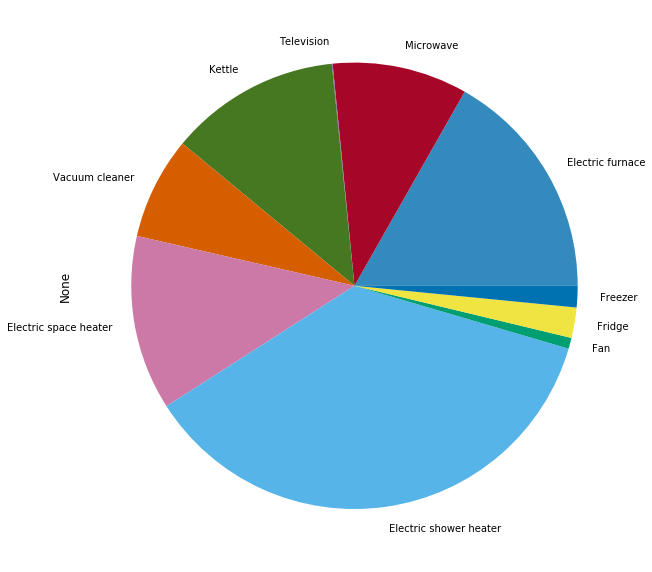

In [95]:
# Creacion de convenientes etiquetas
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

## Gráficos

### Horno

Ahora vamos a mostrar los diferentes de la potencia, tension y corriente

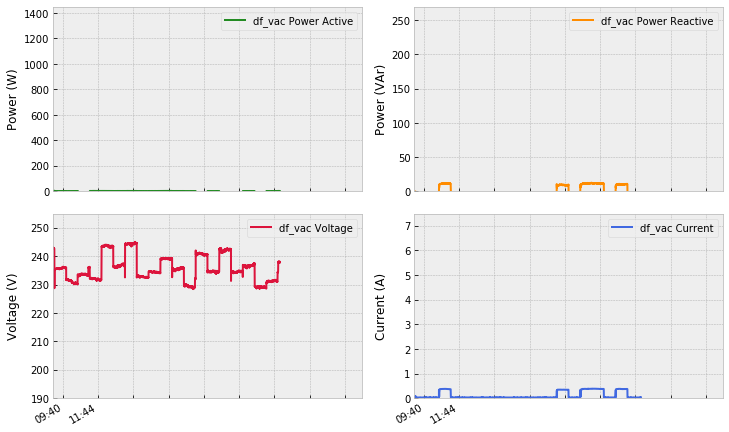

In [96]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_vac = next(elec[2].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ef['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_vac Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_ef['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_vac Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_ef['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_vac Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ef['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_vac Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:44'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_ef.svg', bbox_inches='tight', transparent=True)
pass

### Microondas

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 3 (microondas)

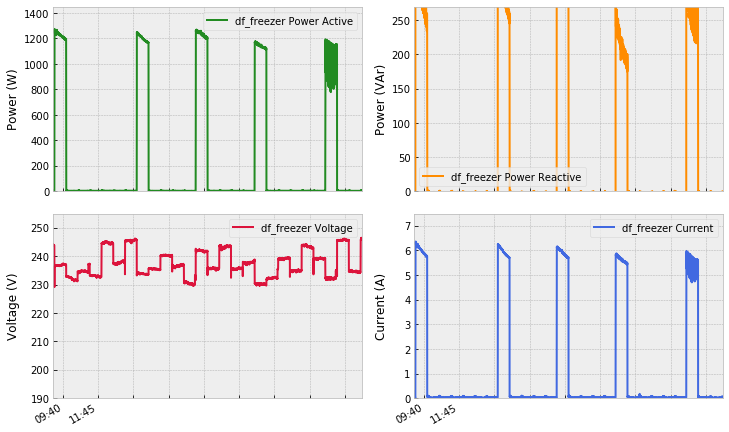

In [97]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_mi = next(elec[3].load())[t0:t1] #DataFrame medidor 


rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_mi['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_freezer Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_mi['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_freezer Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_mi['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_freezer Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_mi['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_freezer Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_freezer.svg', bbox_inches='tight', transparent=True)
pass

### Television

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 2 (Boiler)

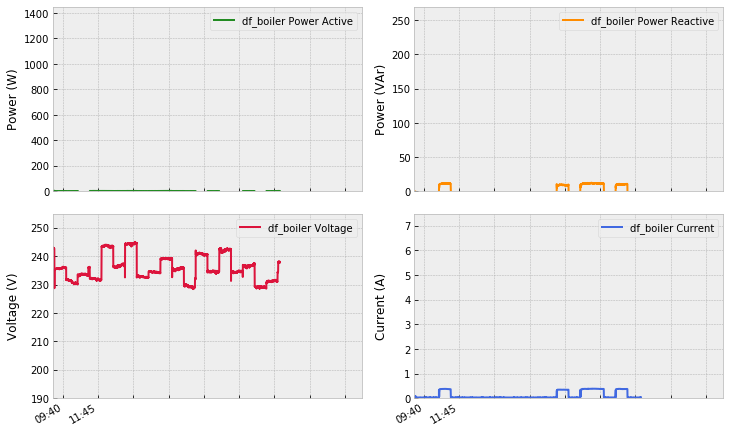

In [98]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_tv = next(elec[4].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_tv['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_boiler Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_tv['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_boiler Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_tv['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_boiler Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_tv['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_boiler Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_boiler.svg', bbox_inches='tight', transparent=True)
pass

### Kettle

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 7 (Light)

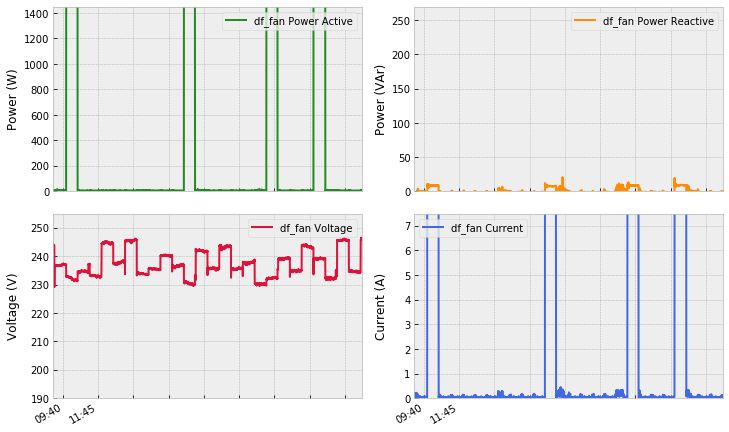

In [99]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final

df_ke = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ke['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_fan Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_ke['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_fan Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_ke['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_fan Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ke['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_fan Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_light.svg', bbox_inches='tight', transparent=True)
pass

###  Aspiradora

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 3 (Fan)

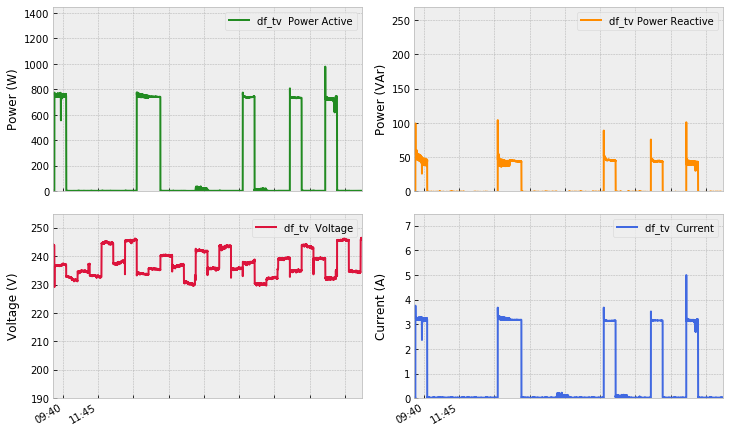

In [100]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_vc = next(elec[6].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_vc ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_vc ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_vc ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_vc ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

### Estufa de aceite

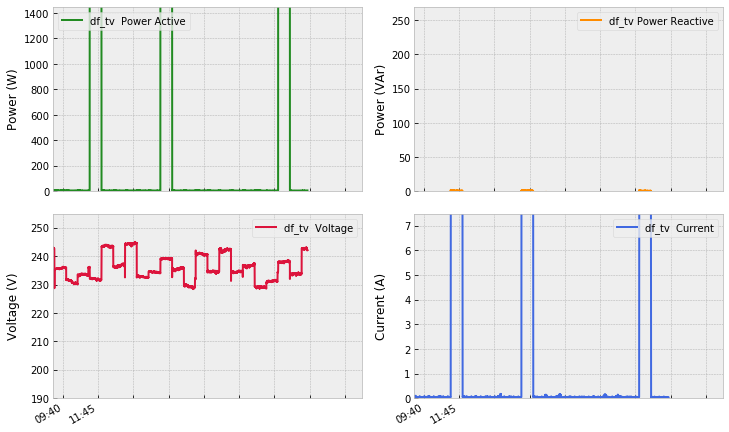

In [101]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_sh = next(elec[7].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sh ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_sh ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sh ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sh ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

### Calentador

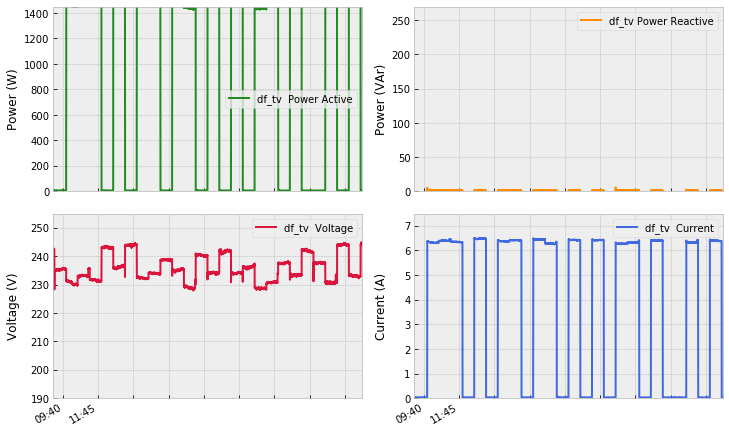

In [102]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_sho = next(elec[8].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sho ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_sho ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sho ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sho ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

### Ventilador

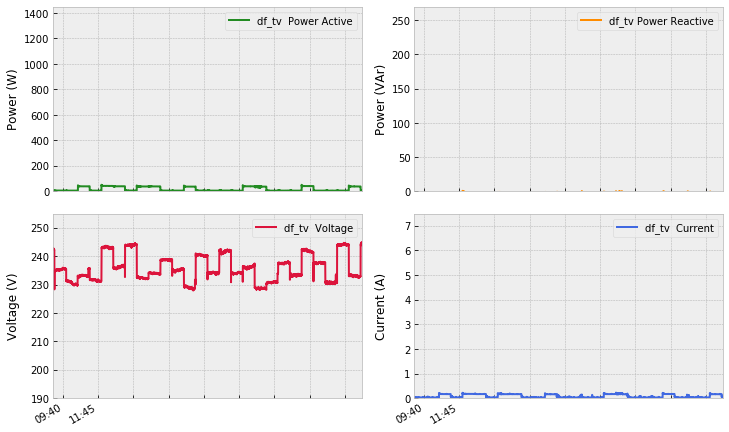

In [103]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_fan = next(elec[9].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fan ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fan ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fan ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fan ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

### Nevera

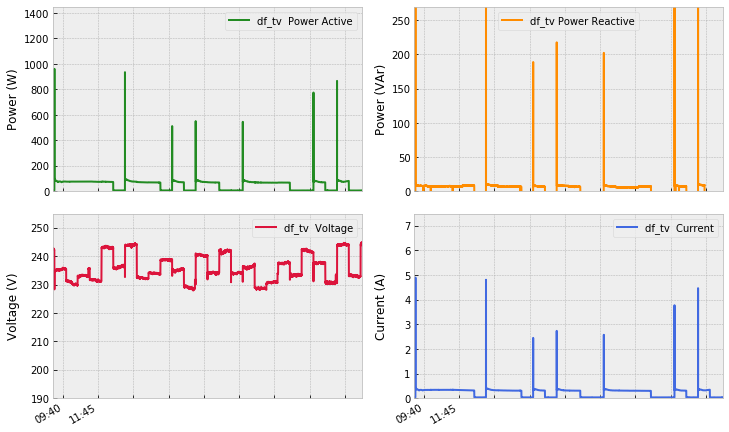

In [104]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_fri = next(elec[10].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fri ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fri ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fri ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fri ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

### Congelador

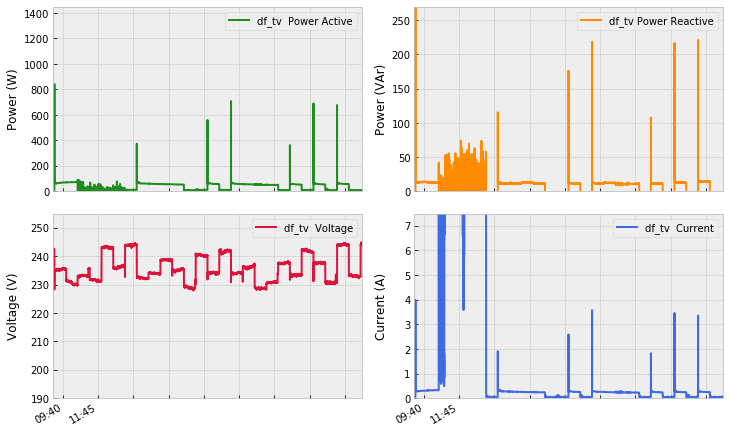

In [105]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_fre = next(elec[11].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fre ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fre ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fre ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fre ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

### M.Principal

Por ultimo veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 5 (TV)

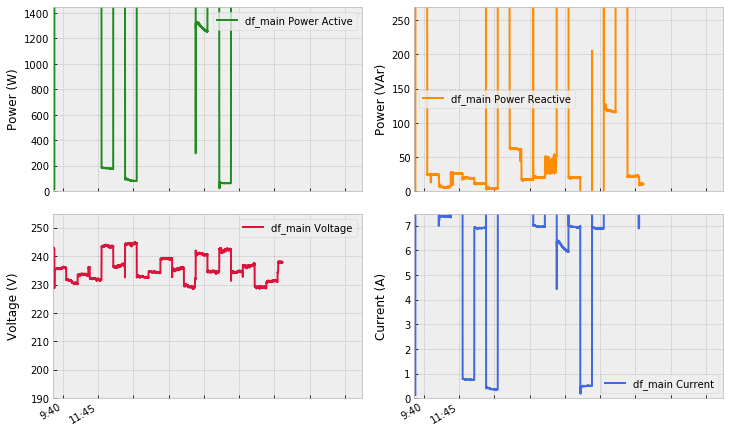

In [106]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_main = next(elec[1].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_main['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_main Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_main['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_main Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_main['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_main Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_main['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_main Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['9:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_tv.svg', bbox_inches='tight', transparent=True)
pass

### Trazar los electrodomésticos cuando estén en uso

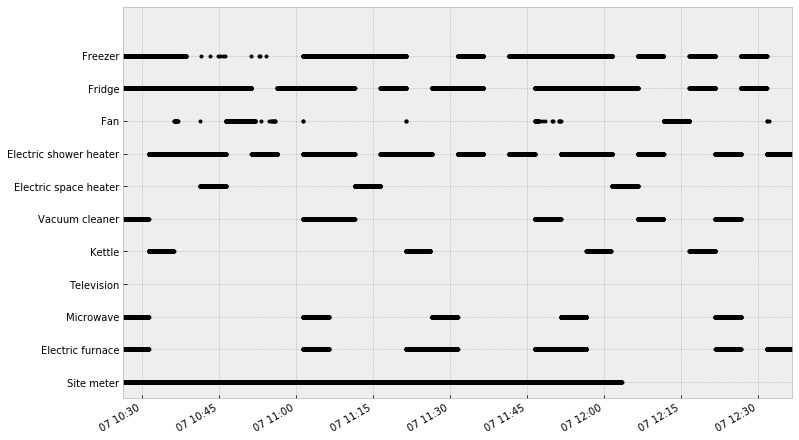

In [107]:
#sns.set_palette("Set3", n_colors=12)
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 40)

## Trazar datos submedidos para un solo día

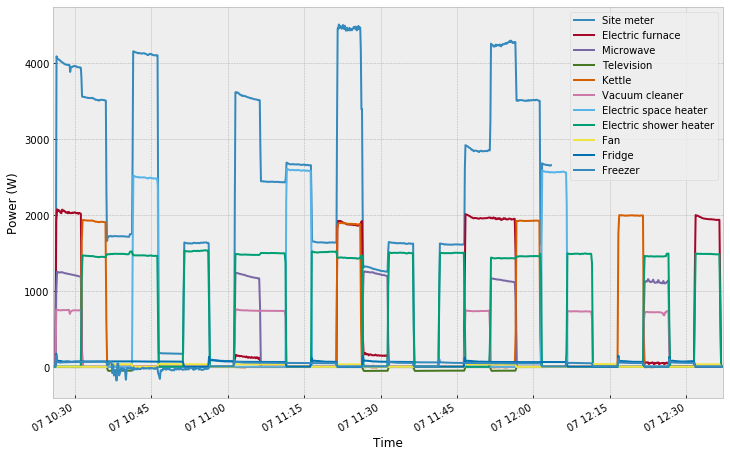

In [108]:
dsualm.set_window(start='2022-11', end='2022-12')
elec.plot();
plt.xlabel("Time");

## Gráfico de autocorrelación

In [109]:
from pandas.plotting import autocorrelation_plot

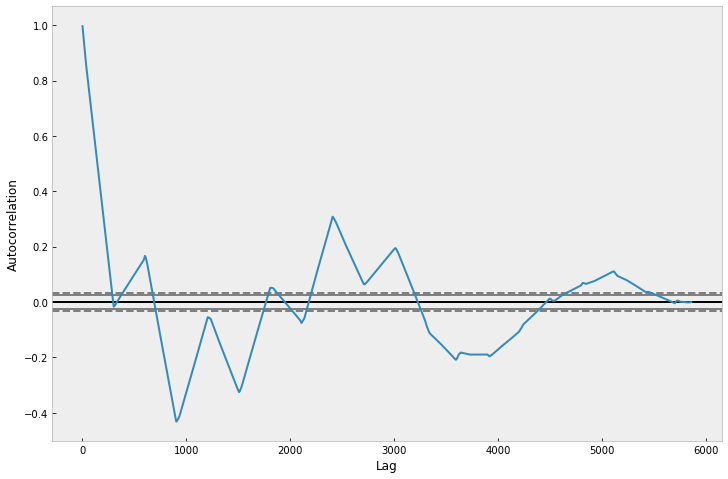

In [110]:
elec.mains().plot_autocorrelation();

## Cambio en el muestreo de datos

Al cambiar el muestro de datos, NILMTK utiliza por defecto el método mean o media aritmética el cual calculará un promedio de los valores que se encuentren de la serie de tiempo, divididos en grupos correspondientes al nuevo periodo de muestreo. Además de este método se pueden especificar otros tales como el primer dato válido (first), la mediana (median), el valor más cercano (nearest), o utilizar el valor inmediatamente posterior (ffill o pad), entre otros.

### Energia activa

Vamos ahora analizar la potencia  activa correspondiente el contador global  usando diferentes periodos de muestreo

In [111]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='active',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='active', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='active', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

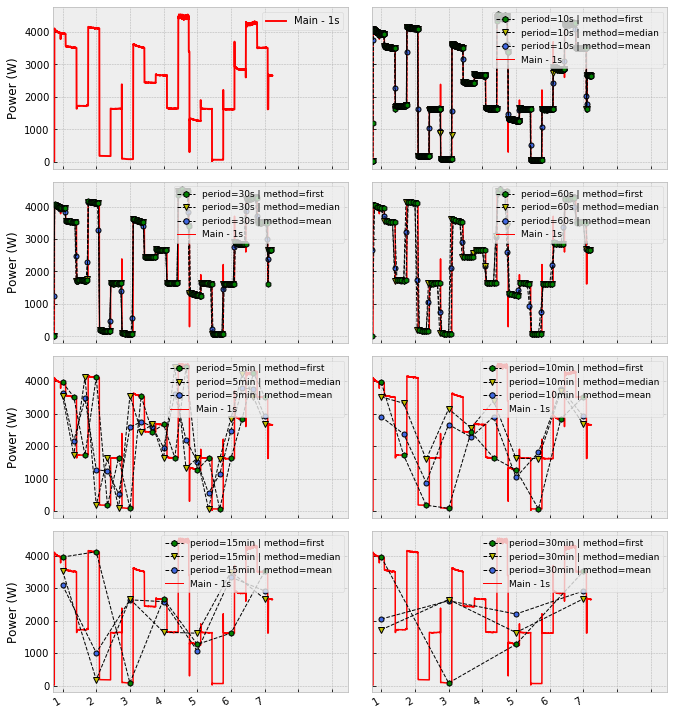

In [112]:
rcParams['figure.figsize'] = (11, 14)

t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final

labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['1','2','3','4','5','6','7'])

#guarda gráfico
plt.savefig('./data/images/2.3_Resample.svg', bbox_inches='tight', transparent=True)
pass

### Energia reactiva

Vamos ahora analizar la potencia  reactiva correspondiente el contador global  usando diferentes periodos de muestreo

In [113]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='reactive',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

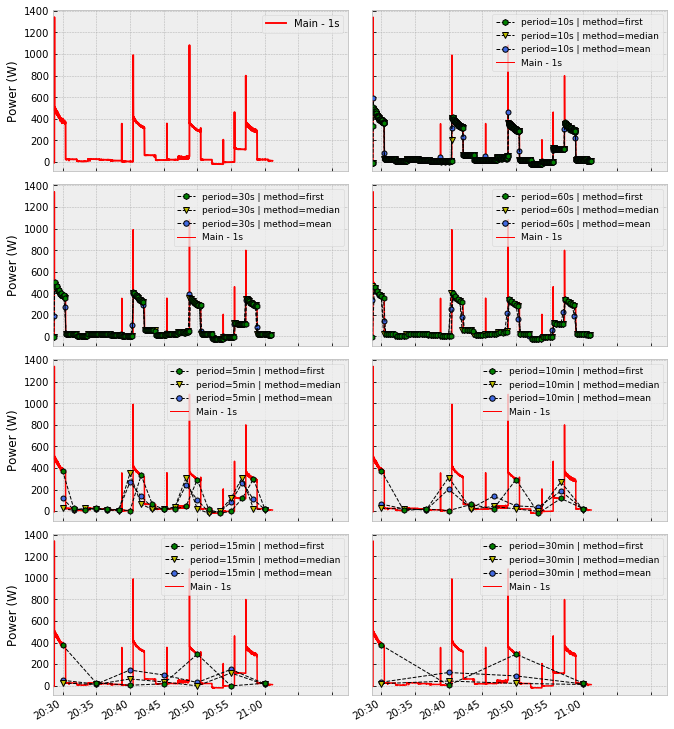

In [114]:
rcParams['figure.figsize'] = (11, 14)

t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

    
ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['20:30','20:35','20:40','20:45','20:50','20:55','21:00'])

#guarda gráfico
plt.savefig('./data/images/2.4_Resample.svg', bbox_inches='tight', transparent=True)
pass